In [12]:
import cv2
import numpy as np
from sklearn import cluster
import matplotlib.pyplot as plt

In [13]:
path='./pictures/'
query_img='dress_query.jpg'
img_path=path+query_img
img_path

'./pictures/dress_query.jpg'

In [14]:
# read the image
image = cv2.imread(path+query_img)

In [15]:
# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

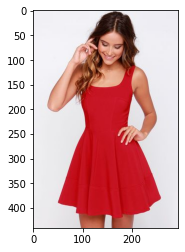

In [16]:
plt.imshow(image)

In [17]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

print(pixel_values.shape)

(129654, 3)


In [18]:
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [19]:
# number of clusters (K)
k = 6
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [20]:
# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

In [21]:
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

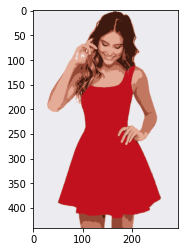

In [22]:
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
# show the image
plt.imshow(segmented_image)
plt.show()

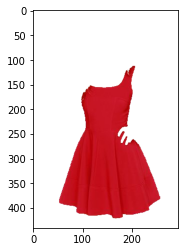

In [36]:
# disable only the cluster number 2 (turn the pixel into black)
masked_image = np.copy(image)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
clust = 2
masked_image[labels != clust] = [255,255,255]

# convert back to original shape
masked_image = masked_image.reshape(image.shape)
# show the image
plt.imshow(masked_image)
plt.show()

In [58]:
masked_image_bgr = cv2.cvtColor(masked_image, cv2.COLOR_RGB2BGR)
cv2.imwrite(f'{path}dress_query_segm.jpg', masked_image_bgr)

True

In [30]:
masked_image_bgr.shape[:2]

(441, 294)

In [91]:
# make background transparent by placing the mask into the alpha channel
mask = labels == clust
mask = mask.reshape(masked_image_bgr.shape[:2])*255
new_img = cv2.cvtColor(masked_image_bgr, cv2.COLOR_BGR2BGRA)
new_img[:, :, 3] = mask
cv2.imshow('crop',new_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite(f'{path}dress_query_segm_tb.png', new_img)


True

In [92]:
# make background transparent by placing the mask into the alpha channel
mask = labels == clust
mask = (mask.reshape(masked_image_bgr.shape[:2])*-255)+255
new_img = cv2.cvtColor(masked_image_bgr, cv2.COLOR_BGR2BGRA)
new_img[:, :, 3] = mask
cv2.imshow('crop',new_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite(f'{path}dress_query_segm_background.png', new_img)


True

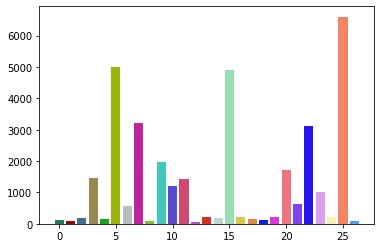

In [109]:

# compute HSV Value equals max(r,g,b)
values = []
for color in colors:
    b=color[0]
    g=color[1]
    r=color[2]
    v=max(b,g,r)
    values.append(v)

# zip colors, counts, values together
unique = zip(colors,counts,values)

# make list of color, count, value
ccv_list = []
for color, count, value in unique:
    ccv_list.append((color, count, value))
    
# function to define key as third element
def takeThird(elem):
    return elem[2]

# sort ccv_list by Value (brightness)
ccv_list.sort(key=takeThird)

# plot each color sorted by increasing Value (brightness)
# pyplot uses normalized r,g,b in range 0 to 1
fig = plt.figure()
length = len(ccv_list)
for i in range(length):
    item = ccv_list[i]
    color = item[0]
    b = color[0]/255
    g = color[1]/255
    r = color[2]/255
    count = item[1]
    plt.bar(i, count, color=((r,g,b)))

# show and save plot
plt.show()
fig.savefig('barn_color_histogram2.png')
plt.close(fig) 

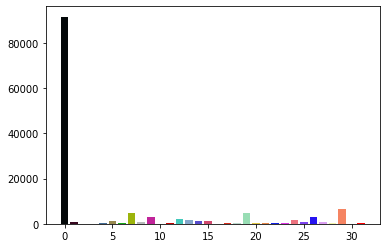

In [53]:
query_img =  'dress_query_segm.jpg'
# query_img =  'dress_query.jpg'

# read image into range 0 to 1
img =  cv2.imread(path+query_img)

# set number of colors
number = 32

# quantize to 16 colors using kmeans
h, w, c = img.shape
img2 = img.reshape(h*w, c)
kmeans_cluster = cluster.KMeans(n_clusters=number)
kmeans_cluster.fit(img2)
cluster_centers = kmeans_cluster.cluster_centers_
cluster_labels = kmeans_cluster.labels_

# need to scale back to range 0-255 and reshape
img3 = cluster_centers[cluster_labels].reshape(h, w, c)*255.0
img3 = img3.astype('uint8')

cv2.imshow('reduced colors',img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

# reshape img to 1 column of 3 colors
# -1 means figure out how big it needs to be for that dimension
img4 = img3.reshape(-1,3)

# get the unique colors
colors, counts = np.unique(img4, return_counts=True, axis=0)

# compute HSV Value equals max(r,g,b)
values = []
for color in colors:
    b=color[0]
    g=color[1]
    r=color[2]
    v=max(b,g,r)
    values.append(v)

# zip colors, counts, values together
unique = zip(colors,counts,values)

# make list of color, count, value
ccv_list = []
for color, count, value in unique:
    ccv_list.append((color, count, value))
    
# function to define key as third element
def takeThird(elem):
    return elem[2]

# sort ccv_list by Value (brightness)
ccv_list.sort(key=takeThird)

# plot each color sorted by increasing Value (brightness)
# pyplot uses normalized r,g,b in range 0 to 1
fig = plt.figure()
length = len(ccv_list)
for i in range(length):
    item = ccv_list[i]
    color = item[0]
    b = color[0]/255
    g = color[1]/255
    r = color[2]/255
    count = item[1]
    plt.bar(i, count, color=((r,g,b)))

# show and save plot
plt.show()
fig.savefig('barn_color_histogram2.png')
plt.close(fig) 

In [111]:
query_img =  'dress_query_segm.jpg'

img =  cv2.imread(path+query_img)

g_kernel = cv2.getGaborKernel((21, 21), 8.0, np.pi/4, 10.0, 0.5, 0, ktype=cv2.CV_32F)

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
filtered_img = cv2.filter2D(img, cv2.CV_8UC3, g_kernel)

cv2.imshow('image', img)
cv2.imshow('filtered image', filtered_img)

h, w = g_kernel.shape[:2]
g_kernel = cv2.resize(g_kernel, (3*w, 3*h), interpolation=cv2.INTER_CUBIC)
cv2.imshow('gabor kernel (resized)', g_kernel)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite(f'{path}dress_query_gabor.jpg', filtered_img)


True

In [120]:
def create_gaborfilter():
    # This function is designed to produce a set of GaborFilters 
    # an even distribution of theta values equally distributed amongst pi rad / 180 degree
     
    filters = []
    num_filters = 30
    ksize = 35  # The local area to evaluate
    sigma = 3.0  # Larger Values produce more edges
    lambd = 10.0
    gamma = 0.5
    psi = 0  # Offset value - lower generates cleaner results
    for theta in np.arange(0, np.pi, np.pi / num_filters):  # Theta is the orientation for edge detection
        kern = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi, ktype=cv2.CV_64F)
        kern /= 1.0 * kern.sum()  # Brightness normalization
        filters.append(kern)
    return filters

In [114]:
def apply_filter(img, filters):
# This general function is designed to apply filters to our image
     
    # First create a numpy array the same size as our input image
    newimage = np.zeros_like(img)
     
    # Starting with a blank image, we loop through the images and apply our Gabor Filter
    # On each iteration, we take the highest value (super impose), until we have the max value across all filters
    # The final image is returned
    depth = -1 # remain depth same as original image
     
    for kern in filters:  # Loop through the kernels in our GaborFilter
        image_filter = cv2.filter2D(img, depth, kern)  #Apply filter to image
         
        # Using Numpy.maximum to compare our filter and cumulative image, taking the higher value (max)
        np.maximum(newimage, image_filter, newimage)
    return newimage

In [118]:
def showimage(myimage, figsize=[10,10]):
    if (myimage.ndim>2):  #This only applies to RGB or RGBA images (e.g. not to Black and White images)
        myimage = myimage[:,:,::-1] #OpenCV follows BGR order, while matplotlib likely follows RGB order
         
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(myimage, cmap = 'gray', interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

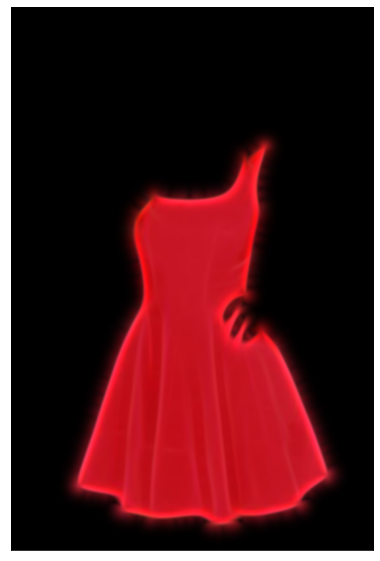

True

In [122]:
# We create our gabor filters, and then apply them to our image
gfilters = create_gaborfilter()
image_g = apply_filter(img, gfilters)
 
# plt.imshow(image_g)
showimage(image_g)
cv2.imwrite(f'{path}dress_query_gabor.jpg', image_g)


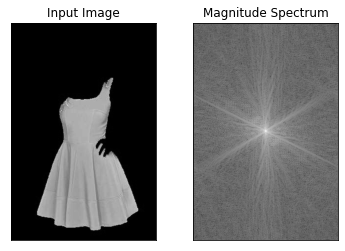

True

In [126]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_float32 = np.float32(gray)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(gray, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show() 

cv2.imwrite(f'{path}dress_query_DFT.jpg', magnitude_spectrum)


In [128]:
# Read the original image
query_img =  'dress_query_segm.jpg'
img =  cv2.imread(path+query_img)

# Display original image
cv2.imshow('Original', img)
cv2.waitKey(0)

# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 

# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
# Display Sobel Edge Detection Images
cv2.imshow('Sobel X', sobelx)
cv2.waitKey(0)
cv2.imshow('Sobel Y', sobely)
cv2.waitKey(0)
cv2.imshow('Sobel X Y using Sobel() function', sobelxy)
cv2.waitKey(0)

# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
# Display Canny Edge Detection Image
cv2.imshow('Canny Edge Detection', edges)
cv2.waitKey(0)

cv2.destroyAllWindows()
cv2.imwrite(f'{path}dress_query_edges.jpg', edges)


True